## Solving UMApHMP with CPLEX

In [1]:
from scipy.spatial import distance_matrix
import numpy as np
import string

from ioutils import parse_input
from plot_utils import plot_solution
import cplex_utils

In [2]:
DATASET = 'AP'
INPUT_FILE_PATH = "./data/AP/generated/20.3"

In [3]:
n, p, alpha, delta, ksi, points, W = parse_input(INPUT_FILE_PATH, DATASET)

In [4]:
C = distance_matrix(points, points)

In [5]:
M, X, Y, Z, H = cplex_utils.get_umaphmp_model(n, p, alpha, delta, ksi, C, W)

[2023-09-05 13:06:51,931] Created model M


[2023-09-05 13:06:52,191] Defined variables X
[2023-09-05 13:06:52,373] Defined variables Y
[2023-09-05 13:06:52,383] Defined variables Z
[2023-09-05 13:06:52,384] Defined variables H
[2023-09-05 13:06:52,388] Defined constraints (2)
[2023-09-05 13:06:52,392] Defined constraints (3)
[2023-09-05 13:06:52,432] Defined constraints (4)
[2023-09-05 13:06:52,519] Defined constraints (5)
[2023-09-05 13:06:52,581] Defined constraints (6)
[2023-09-05 13:06:52,661] Defined constraints (7)
[2023-09-05 13:06:52,778] Defined constraints (1)


In [6]:
M.print_information()

Model: UMApHMP, Ernst and Krishnamoorthy
 - number of variables: 16420
   - binary=20, integer=0, continuous=16400
 - number of constraints: 1621
   - linear=821, quadratic=800
 - parameters: defaults
 - objective: minimize
 - problem type is: MILP


In [7]:
solution = M.solve(log_output=True)

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIP Presolve eliminated 0 rows and 400 columns.
Reduced MIP has 1621 rows, 16020 columns, and 41220 nonzeros.
Reduced MIP has 20 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.04 sec. (11.81 ticks)
Found incumbent of value 5.7704497e+08 after 0.08 sec. (28.31 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 1621 rows, 16020 columns, and 41220 nonzeros.
Reduced MIP has 20 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (15.05 ticks)
Probing time = 0.01 sec. (0.67 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.


Root relaxation solution time = 0.12 sec. (95.79 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                       5.77045e+08        0.0000           100.00%
*     0+    0                       2.48805e+08        0.0000           100.00%
      0     0   1.40918e+08    13   2.48805e+08   1.40918e+08     2277   43.36%
*     0+    0                       1.52325e+08   1.40918e+08             7.49%
*     0+    0                       1.48048e+08   1.40918e+08             4.82%
      0     0   1.44453e+08    14   1.48048e+08     Cuts: 505     4053    2.43%
      0     0        cutoff         1.48048e+08   1.48048e+08     5393    0.00%
Elapsed time = 1.12 sec. (878.77 ticks, tree = 0.01 MB, solutions = 4)

Implied bound cuts applied:  464
Flow cuts applied:  124
Mixed integer rounding cuts applied:  158
Multi commodity flow cuts applied:  4
Lift and project cuts applied:  5


In [8]:
min_cost = solution.objective_value
min_cost

148048299.2576576

In [9]:
hubs = [solution.get_var_value(H[i]) for i in range(n)]
Z_allocated = {(i,k): solution.get_var_value(Z[i,k]) for i in range(n) for k in range(n)}
X_allocated = {(i,l,j): solution.get_var_value(X[i,l,j]) for i in range(n) for l in range(n) for j in range(n)}
Y_allocated = {(i,k,l): solution.get_var_value(Y[i,k,l]) for i in range(n) for k in range(n) for l in range(n)}

In [10]:
flow = cplex_utils.get_flow_from_XYZ(n, X_allocated, Y_allocated, Z_allocated)

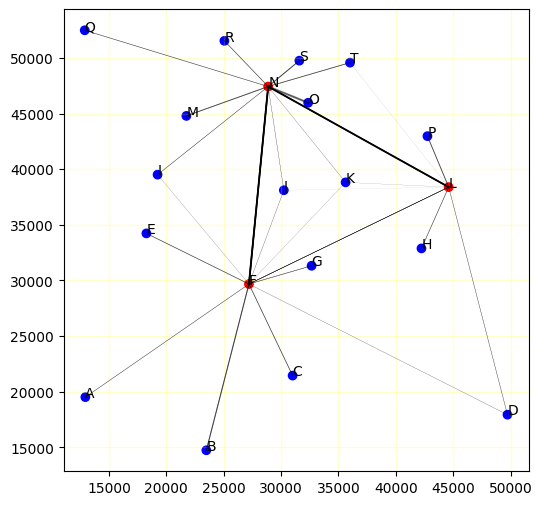

In [11]:
plot_solution(points, hubs, flow, point_labels='alphabet', plot_all_lines=False, verbose=2)
